# Load Packages

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Load and Clean Dataframe

In [21]:
data = pd.read_table("GrainSizeDistribution.dat", sep="\s+")

In [22]:
data.columns

Index(['Sediment', 'grain', 'size', 'distribution', '(source', 'US', 'Army',
       'Corps', 'of', 'Engineers)'],
      dtype='object')

In [23]:
data.drop(['distribution', '(source', 'US', 'Army',
       'Corps', 'of', 'Engineers)'], axis=1, inplace=True)
data.drop([0,1,2,3], axis=0, inplace=True)
data.rename(columns={"Sediment": "GrainSize_mm", "grain": "Percent", "size":"CumulativePercCoarser"}, inplace=True)
data = data.astype(np.float)

In [24]:
data

,GrainSize_mm,Percent,CumulativePercCoarser
4,4.000,0.00,0.00
5,3.364,0.26,0.26
6,2.828,0.16,0.42
7,2.378,0.17,0.59
8,2.000,0.22,0.81
9,1.682,0.22,1.03
10,1.414,0.48,1.51
11,1.189,0.76,2.27
12,1.000,0.83,3.10
13,0.841,1.59,4.69


In [25]:
data['CumulativePercFiner'] = 100 - data['CumulativePercCoarser']

In [26]:
#data.describe()

# --- Question a ---

### <span style="color:STEELBLUE">**GIVEN:**</span> grain size (mm)
### <span style="color:STEELBLUE">**FIND:**</span> mean and median diameter  
### <span style="color:STEELBLUE">**PRINCIPLES:**</span>
### Krumbien (1936) Phi Scale:
### $\phi = -\log_2 d$
### Otto (1939 and Inman (1952):
### $M_{d\phi} =  \frac{(\phi_{84} + \phi_{16})}2$
### $d_{mean} =  {2}^{-M_{d\phi}}$
### Sorting:
### $\sigma_{\phi} = \frac{(\phi_{84} - \phi_{16})}2$

### <span style="color:STEELBLUE">**SOLUTION:**</span>

In [27]:
# Add phi scale column
data['phi'] = -np.log2(data.GrainSize_mm)

In [28]:
data

,GrainSize_mm,Percent,CumulativePercCoarser,CumulativePercFiner,phi
4,4.000,0.00,0.00,100.00,-2.000000
5,3.364,0.26,0.26,99.74,-1.750178
6,2.828,0.16,0.42,99.58,-1.499782
7,2.378,0.17,0.59,99.41,-1.249749
8,2.000,0.22,0.81,99.19,-1.000000
9,1.682,0.22,1.03,98.97,-0.750178
10,1.414,0.48,1.51,98.49,-0.499782
11,1.189,0.76,2.27,97.73,-0.249749
12,1.000,0.83,3.10,96.90,-0.000000
13,0.841,1.59,4.69,95.31,0.249822


In [29]:
#Find percentiles -- CHECK WITH ANMOL TO SEE IF CODE ACCEPTABLE
# phi_84 = np.percentile(data.phi, 84) 
# phi_16 = np.percentile(data.phi, 16)

# Use Cumulative Percent Coarser
x = [83.43, 93.35]
y = [2.498179, 2.746616]

phi_84 = np.interp(84, x, y)

x = [15.71, 20.16]
y = [1.000000, 1.251539]


phi_16 = np.interp(16, x, y)

In [30]:
#Calculate d_mean:
M_dphi = (phi_84 + phi_16) / 2
d_mean = np.power(2, (-M_dphi))

In [31]:
d_mean

0.29434432760858464

### Mean grain size is 0.29 mm

In [32]:
# Calculate d_median:
# phi_50 = np.percentile(data.phi, 50)
# d_median = np.power(2, (-phi_50))

x = [36.69, 54.10]
y = [1.751465, 2.000000]

phi_50 = np.interp(50, x, y)
d_median = np.power(2, (-phi_50))

In [33]:
d_median

0.26035088344971896

### Median grain size is 0.26 mm

In [34]:
# Calculate sorting (standard deviation):
std_phi = (phi_84 - phi_16) / 2

In [35]:
std_phi
# std_phi >= 1, BETWEEN WELL AND POORLY SORTED

0.7480308403327744

### Because the standard deviation (phi units) is 0.75, it is between well and poorly sorted

# ------ ---  Question b --------- 

### <span style="color:STEELBLUE">**GIVEN:**</span> grain size (mm), std_phi (standard deviation in phi units) = 0.75, M_dphi (mean in phi units) = 1.76
### <span style="color:STEELBLUE">**FIND:**</span> Plot grain size (in mm) distribution together with the log-normal cumulative distribution function (CDF)  
### <span style="color:STEELBLUE">**PRINCIPLES:**</span>
### Equation 2.2 log-normal probability density function:
### $f(\phi) = \frac{1}{\sigma_\phi \sqrt{2\pi}}e^-{\frac{{(\phi-\mu_\phi)}^2}{2\sigma_\phi^2}}$
### Equation 2.3 CDF:
### $P[\phi < \phi_g] = \int_{-\infty}^{\phi_g} f(\phi)d\phi$

### <span style="color:STEELBLUE">**SOLUTION (CALC CDF AND PLOT):**</span>

In [36]:
g = data['phi']

# PDF 
y = ((1/(std_phi*np.sqrt(2*np.pi)))*(np.e**((-(g - M_dphi)**2)/(2 * (std_phi**2)))))

# CDF
y_int = integrate.cumtrapz(y, initial = 0)

In [37]:
y

4     0.000002
5     0.000009
6     0.000039
7     0.000159
8     0.000577
9     0.001875
10    0.005464
11    0.014211
12    0.033025
13    0.068666
14    0.127869
15    0.212267
16    0.316389
17    0.421607
18    0.500589
19    0.533243
20    0.507521
21    0.431427
22    0.329649
23    0.225224
24    0.136313
25    0.073919
26    0.035436
27    0.015390
28    0.006417
29    0.002253
Name: phi, dtype: float64

In [38]:
y_int

array([  0.00000000e+00,   5.13293821e-06,   2.89652457e-05,
         1.27980681e-04,   4.96041321e-04,   1.72236456e-03,
         5.39188552e-03,   1.52290104e-02,   3.88467621e-02,
         8.96921158e-02,   1.87959323e-01,   3.58027238e-01,
         6.22355565e-01,   9.91353503e-01,   1.45245134e+00,
         1.96936757e+00,   2.48974960e+00,   2.95922363e+00,
         3.33976197e+00,   3.61719852e+00,   3.79796674e+00,
         3.90308282e+00,   3.95776068e+00,   3.98317366e+00,
         3.99407722e+00,   3.99841252e+00])

In [39]:
# convert from phi to mm 
y_mm = np.power(2, (-y))
y_mm = 1 - y_mm
y_int_mm = np.power(2, (-y_int))

In [40]:
y_int_mm

array([ 1.        ,  0.99999644,  0.99997992,  0.99991129,  0.99965623,
        0.99880686,  0.99626961,  0.98949957,  0.97343276,  0.93972327,
        0.87784655,  0.78023075,  0.64960941,  0.50300565,  0.36540003,
        0.25536495,  0.17803717,  0.12858341,  0.09877146,  0.08149196,
        0.0718949 ,  0.06684286,  0.06435693,  0.06323321,  0.06275711,
        0.06256881])

In [41]:
data

,GrainSize_mm,Percent,CumulativePercCoarser,CumulativePercFiner,phi
4,4.000,0.00,0.00,100.00,-2.000000
5,3.364,0.26,0.26,99.74,-1.750178
6,2.828,0.16,0.42,99.58,-1.499782
7,2.378,0.17,0.59,99.41,-1.249749
8,2.000,0.22,0.81,99.19,-1.000000
9,1.682,0.22,1.03,98.97,-0.750178
10,1.414,0.48,1.51,98.49,-0.499782
11,1.189,0.76,2.27,97.73,-0.249749
12,1.000,0.83,3.10,96.90,-0.000000
13,0.841,1.59,4.69,95.31,0.249822


Text(0, 0.5, 'Percent Finer Than')

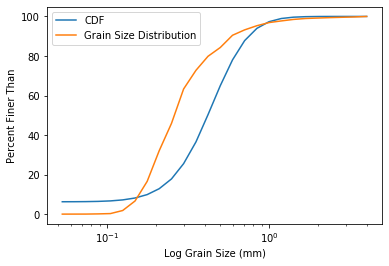

In [42]:


x = data['GrainSize_mm']

y1 = y_int_mm * 100
y2 = data['CumulativePercFiner']

# fig = plt.figure()
# ax = fig

plt.plot(x,y1, label = "CDF")
plt.plot(x,y2, label = "Grain Size Distribution")

plt.legend()

plt.xscale('log')

plt.xlabel('Log Grain Size (mm)')
plt.ylabel("Percent Finer Than")

# 1 axis, cdf and grain size, y axis is goingto be percent finer, raw grrain size

Text(0, 0.5, 'Probability')

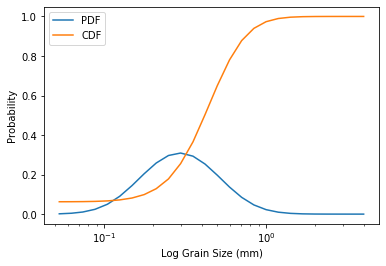

In [44]:
##### PLOT THESE TWO WITH LOG X SCALE ######

x = data['GrainSize_mm']

y1 = y_mm
y2 = y_int_mm

# fig = plt.figure()
# ax = fig

plt.plot(x,y1, label = "PDF")
plt.plot(x,y2, label = "CDF")

plt.legend()

plt.xscale('log')

plt.xlabel('Log Grain Size (mm)')
plt.ylabel("Probability")

# 1 axis, cdf and grain size, y axis is goingto be percent finer, raw grrain size


# --- Question c --- 

### <span style="color:STEELBLUE">**GIVEN:**</span> $s_{quartz} = 2.65$;  $\rho_{seawater} = 1025  kg/m^3$; $\mu_{seawater} = 0.00114 Ns/m^2$
### <span style="color:STEELBLUE">**FIND:**</span> Plot the fall velocity (cm/s) in seawater versus percent finer than
### <span style="color:STEELBLUE">**PRINCIPLES:**</span>
### Equation 2.11 fall velocity:
### $ w = \sqrt{\frac{4(\rho_s - \rho) g d}{3 \rho C_D}}$ 
### Reynolds Number:
### $Re = \frac{\rho w d}{\mu}$
### Equation 2.13 approximation for a sphere's drag coefficient :
### $ C_D = \frac{24}{Re} \sqrt{(1 + \frac{3 Re}{16})}$  



### <span style="color:STEELBLUE">**SOLUTION: Sample Calc; d = 0.5 mm**</span>

In [60]:
# Fall velocity 1
w = np.sqrt((4/3)* (2.65 - 1) * 9.81 * (0.5) * (1/1000))
print ("w is   {} * C_D ^ (- 1/2) m/s".format(w))

w is   0.1038797381590847 * C_D ^ (- 1/2) m/s


In [61]:
# Reynolds number (sewater)
# Density of seawater 1025
# Viscosity of seawater .00114

Re = ((1025) * (0.5) * (1/1000)) / (0.00114)
print ("Re is   {} * w (m/s)".format(Re))

Re is   449.5614035087719 * w (m/s)


#### Iterate 1

In [62]:
# Iterate with C_D, guess C_D = 2
w2 = w / np.sqrt(2)
print ("w2 is {} m/s".format(w2))

w2 is 0.07345406728017176 m/s


In [63]:
Re2 = (Re * w2)
print ("Re2 is {}".format(Re2))

Re2 is 33.02211357990178


In [64]:
CD = (24/Re2) * np.sqrt(1 + ((3*Re2)/(16)))
print ("CD is {}".format(CD))

CD is 1.9490390236439714


---------

#### Iterate 2

In [65]:
# Iterate with C_D, C_D = 1.1055931228942726
w3 = (w / np.sqrt(CD))
print ("w3 is {} m/s".format(w3))

w3 is 0.07440816234970565 m/s


In [66]:
Re3 = (Re * w3)
print ("Re3 is {}".format(Re3))

Re3 is 33.45103789844223


In [67]:
CD2 = (24/Re3) * np.sqrt(1 + ((3*Re3)/(16)))
print ("CD2 is {}".format(CD2))

CD2 is 1.9347758504361243


-------

### Iterate 3

In [68]:
# Iterate with C_D, C_D = 1.5191487630679061

w4 = (w / np.sqrt(CD2))
print ("w4 is {} m/s".format(w4))

w4 is 0.07468192732197794 m/s


In [69]:
Re4 = (Re * w4)
print ("Re4 is {}".format(Re4))

Re4 is 33.5741120636085


In [70]:
CD3 = (24/Re4) * np.sqrt(1 + ((3*Re4)/(16)))
print ("CD3 is {}".format(CD3))

CD3 is 1.9307395831211043


-----------

# Solve for all data ## SOME ERROR BETWEEN 2 and 3 ITERATION? SEEMS HIGH, CHECK WITH ANMOL

In [ ]:
## Try converting to cm/s at the very very end?

In [71]:
grains = data['GrainSize_mm'] 

In [72]:
w_result = []
Re_result = []

for g in grains:
    w = np.sqrt((4/3)* (2.65 - 1) * 9.81 * (g) * (1/1000))
    w_result.append(w)
    Re = ((1025) * (g) * (1/1000)) / (0.00114)
    Re_result.append(Re)

In [73]:
# convert velocity to cm/s

w_result_cm = []
for w in w_result:
    w2 = w * 100
    w_result_cm.append(w2)

In [74]:
# Iterate
CD=10
w2_result = []
for w in w_result_cm:
    w2 = w / np.sqrt(CD)
    w2_result.append(w2)


In [75]:
df = pd.DataFrame({'w_base_cm_s': w_result_cm, 'Re_base':Re_result, 'w2': w2_result})

In [76]:
df['Re2'] = df['Re_base'] * df['w2']

In [77]:
df['CD2'] = (24/df['Re2']) * np.sqrt(1 + ((3*df['Re2'])/(16)))

In [78]:
df['w3'] = df['w_base_cm_s'] / np.sqrt(df['CD2'])

In [277]:
df['Re3'] = df['Re_base'] * df['w3']

In [278]:
df['CD3'] = (24/df['Re3']) * np.sqrt(1 + ((3*df['Re3'])/(16)))

In [279]:
df['w4'] = df['w_base_cm_s'] / np.sqrt(df['CD3'])

In [281]:
df['Re4'] = df['Re_base'] * df['w4']

In [282]:
df['CD4'] = (24/df['Re4']) * np.sqrt(1 + ((3*df['Re4'])/(16)))

In [283]:
df['w5'] = df['w_base_cm_s'] / np.sqrt(df['CD4'])

In [284]:
df['Re5'] = df['Re_base'] * df['w5']

In [285]:
df['CD5'] = (24/df['Re5']) * np.sqrt(1 + ((3*df['Re5'])/(16)))

In [286]:
df['w6'] = df['w_base_cm_s'] / np.sqrt(df['CD5'])

In [287]:
df['Re6'] = df['Re_base'] * df['w6']

In [288]:
df['CD6'] = (24/df['Re6']) * np.sqrt(1 + ((3*df['Re6'])/(16)))

In [289]:
df['w7'] = df['w_base_cm_s'] / np.sqrt(df['CD6'])

In [354]:
df

,w_base_cm_s,Re_base,w2,Re2,CD2,w3,Re3,CD3,w4,Re4,CD4,w5,Re5,CD5,w6,Re6,CD6,w7
0,29.381627,3596.491228,9.291286,33416.029461,0.056855,123.222860,443169.935327,0.015611,235.158763,845746.427936,0.011300,276.394413,994050.080129,0.010423,287.787141,1.035024e+06,0.010215,290.707970
1,26.944730,3024.649123,8.520672,25772.042499,0.064741,105.896753,320300.519832,0.018363,198.840800,601423.651360,0.013401,232.761990,704023.349188,0.012386,242.110621,7.322997e+05,0.012144,244.505886
2,24.705039,2542.719298,7.812419,19864.789431,0.073744,90.974872,231323.562645,0.021608,168.066855,427346.834983,0.015897,195.940123,498220.731376,0.014723,203.602869,5.177049e+05,0.014444,205.564950
3,22.654359,2138.114035,7.163937,15317.314643,0.083984,78.172444,167141.600085,0.025420,142.089997,303804.616634,0.018855,164.984261,352755.164694,0.017498,171.262600,3.661790e+05,0.017174,172.869191
4,20.775948,1798.245614,6.569932,11814.350516,0.095632,67.182841,120811.248794,0.029900,120.150879,216060.791730,0.022358,138.946053,249859.130050,0.020791,144.087528,2.591048e+05,0.020416,145.402381
5,19.052801,1512.324561,6.025025,9111.793008,0.108902,57.735154,87314.291810,0.035171,101.593893,153642.939942,0.026513,117.011160,176958.851050,0.024705,121.218164,1.833212e+05,0.024272,122.293372
6,17.469101,1271.359649,5.524215,7023.263657,0.124053,49.598316,63057.298258,0.041387,85.869566,109171.101088,0.031453,98.500000,125228.924888,0.029368,101.938010,1.295999e+05,0.028868,102.816138
7,16.019051,1069.057018,5.065669,5415.488527,0.141288,42.617048,45560.054754,0.048691,72.596249,77609.529663,0.037305,82.937728,88665.160213,0.034902,85.745740,9.166709e+04,0.034326,86.462516
8,14.690813,899.122807,4.645643,4177.003683,0.160900,36.624152,32929.610360,0.057274,61.385948,55193.506223,0.044237,69.847587,62801.558919,0.041471,72.139527,6.486229e+04,0.040807,72.724217
9,13.472365,756.162281,4.260336,3221.505312,0.183249,31.471904,23797.866643,0.067374,51.903672,39247.598667,0.052461,58.820190,44477.608979,0.049280,60.689037,4.589076e+04,0.048515,61.165510


In [303]:
df['w7']

0     290.707970
1     244.505886
2     205.564950
3     172.869191
4     145.402381
5     122.293372
6     102.816138
7      86.462516
8      72.724217
9      61.165510
10     51.423250
11     43.279618
12     36.371299
13     30.553046
14     25.752319
15     21.605566
16     18.185648
17     15.274384
18     12.871869
19     10.832585
20      9.083725
21      7.625325
22      6.384505
23      5.361324
24      4.556033
25      3.822266
Name: w7, dtype: float64

In [298]:
data.reset_index(inplace=True)

In [299]:
data['w_cm_s'] = df['w7']

In [300]:
data

,index,GrainSize_mm,Percent,CumulativePercCoarser,phi,w_cm_s
0,4,4.000,0.00,0.00,-2.000000,290.707970
1,5,3.364,0.26,0.26,-1.750178,244.505886
2,6,2.828,0.16,0.42,-1.499782,205.564950
3,7,2.378,0.17,0.59,-1.249749,172.869191
4,8,2.000,0.22,0.81,-1.000000,145.402381
5,9,1.682,0.22,1.03,-0.750178,122.293372
6,10,1.414,0.48,1.51,-0.499782,102.816138
7,11,1.189,0.76,2.27,-0.249749,86.462516
8,12,1.000,0.83,3.10,-0.000000,72.724217
9,13,0.841,1.59,4.69,0.249822,61.165510


In [304]:
data['CumulativePercFiner'] = 100 - data['CumulativePercCoarser']

In [306]:
data['GrainSize_cm'] = data['GrainSize_mm'] / 10

In [307]:
data

,index,GrainSize_mm,Percent,CumulativePercCoarser,phi,w_cm_s,CumulativePercFiner,GrainSize_cm
0,4,4.000,0.00,0.00,-2.000000,290.707970,100.00,0.4000
1,5,3.364,0.26,0.26,-1.750178,244.505886,99.74,0.3364
2,6,2.828,0.16,0.42,-1.499782,205.564950,99.58,0.2828
3,7,2.378,0.17,0.59,-1.249749,172.869191,99.41,0.2378
4,8,2.000,0.22,0.81,-1.000000,145.402381,99.19,0.2000
5,9,1.682,0.22,1.03,-0.750178,122.293372,98.97,0.1682
6,10,1.414,0.48,1.51,-0.499782,102.816138,98.49,0.1414
7,11,1.189,0.76,2.27,-0.249749,86.462516,97.73,0.1189
8,12,1.000,0.83,3.10,-0.000000,72.724217,96.90,0.1000
9,13,0.841,1.59,4.69,0.249822,61.165510,95.31,0.0841


Text(0, 0.5, 'Cumulative Percent Finer Than')

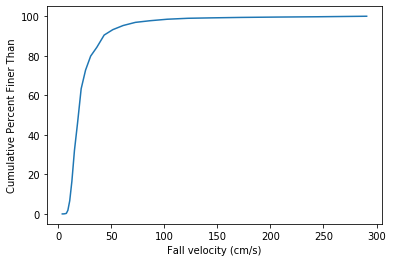

In [314]:
x = data['w_cm_s']
y = data['CumulativePercFiner']

plt.plot(x,y)

plt.xlabel('Fall velocity (cm/s)')
plt.ylabel("Cumulative Percent Finer Than")



# SCRAP

In [171]:
# t = np.linspace(-2, 4, 100)
# y = ((1/(std_phi*np.sqrt(2*np.pi)))*(np.e**((-(t - M_dphi))/(2 * (std_phi**2)))))

# y_int = integrate.cumtrapz(y, t, initial = 0)

In [172]:
# y_int

Text(0.5, 1.0, 'Probability that a sand size is coarser than a given size')

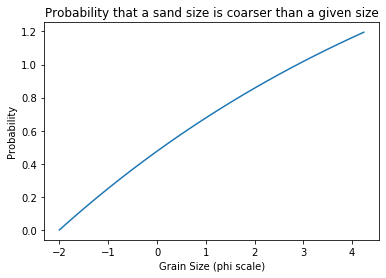

In [173]:
# Plot

x = g
y = y_int

plt.plot(x,y)

plt.xlabel('Grain Size (phi scale)') 
plt.ylabel('Probability')
plt.title('Probability that a sand size is coarser than a given size')

## Just converting the x values to mm without messing with probabilty values

Text(0.5, 1.0, 'Probability that a sand size is coarser than a given size')

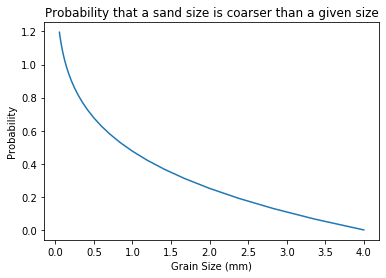

In [174]:
# Plot ** NEED TO CAP THIS AT 1 *** ALSO, IS THIS THE CORRECT WAY TO CONVERT FROM PHI TO MM?

x = np.power(2, (-g))
y = y_int

plt.plot(x,y)

plt.xlabel('Grain Size (mm)') 
plt.ylabel('Probability')
plt.title('Probability that a sand size is coarser than a given size')


## Recalc probabilities using mm values for mean and standard deviation

In [175]:
std = np.power(2, (-std_phi))
d_mean

g = data['GrainSize_mm']
y = ((1/(std*np.sqrt(2*np.pi)))*(np.e**((-(g - d_mean))/(2 * (std**2)))))

y_int2 = integrate.cumtrapz(y, g, initial = 0)


Text(0.5, 1.0, 'Probability that a sand size is coarser than a given size')

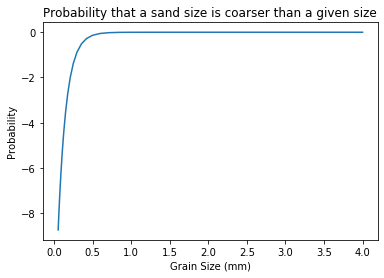

In [176]:
# Plot

x = g
y = y_int2

plt.plot(x,y)

plt.xlabel('Grain Size (mm)') 
plt.ylabel('Probability')
plt.title('Probability that a sand size is coarser than a given size')

In [94]:
# Iterate with C_D, C_D = 1.2793564149304648
w5 = (w * CD3)
print ("w5 is {} m/s".format(w5))

w5 is 0.132899209395122 m/s


In [103]:
Re5 = (Re * w5)
print ("Re5 is {}".format(Re5))

Re5 is 59.74635510087721


In [96]:
CD4 = (24/Re5) * np.sqrt(1 + ((3*Re5)/(16)))
print ("CD4 is {}".format(CD4))

CD4 is 1.4032116914088042


________

In [100]:
# Iterate with C_D, C_D = 1.4032116914088042
w6 = (w * CD4)
print ("w6 is {} m/s".format(w6))

w6 is 0.14576526308531296 m/s


In [98]:
Re6 = (Re * w6)
print ("Re6 is {}".format(Re6))

Re6 is 65.53043625545867


In [99]:
CD5 = (24/Re6) * np.sqrt(1 + ((3*Re6)/(16)))
print ("CD5 is {}".format(CD5))

CD5 is 1.3349990110332997


_____

In [101]:
# Iterate with C_D, C_D = 1.3349990110332997
w7 = (w * CD5)
print ("w7 is {} m/s".format(w7))

w7 is 0.13867934770877618 m/s


In [104]:
#Calculate log-normal probability density function (pdf)
data['pdf'] = (1/(std_phi*np.sqrt(2*np.pi)))*(np.e**((-(data.phi - M_dphi))/(2 * (std_phi**2))))

In [155]:
data

,GrainSize_mm,Percent,CumulativePercCoarser,phi,pdf
4,4.000,0.00,0.00,-2.000000,0.265214
5,3.364,0.26,0.26,-1.750178,0.257984
6,2.828,0.16,0.42,-1.499782,0.250934
7,2.378,0.17,0.59,-1.249749,0.244087
8,2.000,0.22,0.81,-1.000000,0.237435
9,1.682,0.22,1.03,-0.750178,0.230961
10,1.414,0.48,1.51,-0.499782,0.224650
11,1.189,0.76,2.27,-0.249749,0.218520
12,1.000,0.83,3.10,-0.000000,0.212564
13,0.841,1.59,4.69,0.249822,0.206769


Text(0.5, 1.0, 'Log-Normal Probability Density Function')

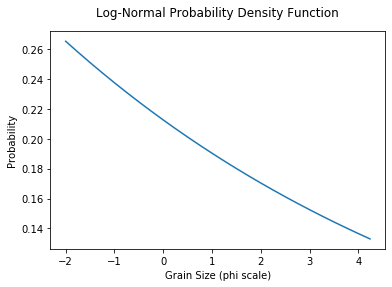

In [138]:
# Plot
x = data.phi
y = data.pdf

plt.plot(x,y)

plt.xlabel('Grain Size (phi scale)') 
plt.ylabel('Probability')
plt.title('Log-Normal Probability Density Function')

In [210]:
#cdf = integrate.cumtrapz((1/(std_phi*np.sqrt(2*np.pi)))*(np.e**((-(data.phi - M_dphi))/(2 * (std_phi**2)))))

Text(0.5, 1.0, 'Probability that a sand size is coarser than a given size')

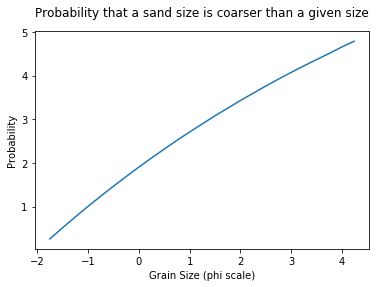

In [177]:
# # Plot
# x1 = pd.DataFrame(data.phi)
# x1.drop(index=4, inplace = True)

# x = x1
# y = cdf

# plt.plot(x,y)

# plt.xlabel('Grain Size (phi scale)') 
# plt.ylabel('Probability')
# plt.title('Probability that a sand size is coarser than a given size')

In [211]:
#cdf

In [178]:
integrate.quad(lambda x: (1/(std_phi*np.sqrt(2*np.pi)))*(np.e**((-(x - M_dphi))/(2 * (std_phi**2)))), 0, 4)

(0.6870418640438852, 7.627696963429078e-15)

In [122]:
x = np.arange(0,4.05,0.05)
x = np.array(x)

In [126]:
cdf = (1/(std_phi*np.sqrt(2*np.pi)))*(np.e**((-(x - M_dphi))/(2 * (std_phi**2))))

In [127]:
cdf

array([ 0.21256448,  0.21139176,  0.2102255 ,  0.20906567,  0.20791225,
        0.20676518,  0.20562445,  0.20449001,  0.20336183,  0.20223987,
        0.2011241 ,  0.20001449,  0.198911  ,  0.1978136 ,  0.19672225,
        0.19563692,  0.19455759,  0.1934842 ,  0.19241674,  0.19135517,
        0.19029945,  0.18924956,  0.18820546,  0.18716712,  0.18613451,
        0.1851076 ,  0.18408635,  0.18307074,  0.18206073,  0.18105629,
        0.18005739,  0.179064  ,  0.1780761 ,  0.17709364,  0.17611661,
        0.17514497,  0.17417868,  0.17321773,  0.17226208,  0.1713117 ,
        0.17036657,  0.16942664,  0.16849191,  0.16756233,  0.16663788,
        0.16571853,  0.16480425,  0.16389502,  0.1629908 ,  0.16209158,
        0.16119731,  0.16030797,  0.15942355,  0.158544  ,  0.1576693 ,
        0.15679943,  0.15593436,  0.15507407,  0.15421852,  0.15336768,
        0.15252155,  0.15168008,  0.15084325,  0.15001104,  0.14918342,
        0.14836037,  0.14754186,  0.14672786,  0.14591836,  0.14

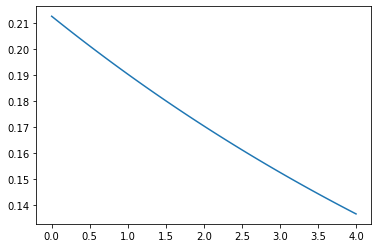

In [129]:
plt.plot(x, cdf)

In [47]:
def histogram_figure(df_target): 
    from matplotlib import rcParams
    rcParams['axes.titlepad'] = 15
    fig, ax = plt.subplots(1,1,figsize=(6, 4))
    plt.rcParams["patch.force_edgecolor"] = True
    sns.distplot(df_target.values)
    fig.text(0.5, 0.02, 'Grain Size (mm)', ha='center', va = 'top', fontsize = 18)
    ax.set_title('Grain Size Distribution', fontsize = 25)
    ax.tick_params(axis='both', which='major', labelsize=15)
    #plt.savefig('targethist.png', dpi=600, bbox_inches = "tight")

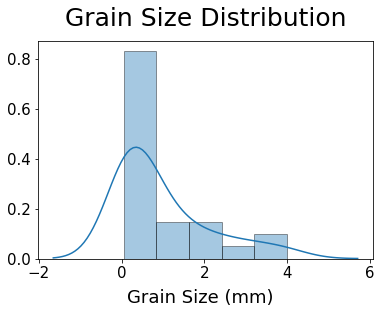

In [48]:
df_target = data['GrainSize_mm']
histogram_figure(df_target)